# Machine Learning Clustering Customer Segmentation

Data Sources:
- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### Import Libraries & Load Data

In [1]:
# Import libraries
import os
import scipy
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
# Label present working directory
pwd = os.getcwd()

# Load data
original_data = pd.read_csv(pwd + "\\raw_data\Mall_Customers.csv")

# Inspect data
original_data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


- Column names need to be cleaned up
- Data contains 4 main features: gender, age, annual income and spending score

### Data Cleaning

In [123]:
# Make copy of data
data1 = original_data.copy()

# Rename columns
data1.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)
data1.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

### Exploratory Data Analysis

In [4]:
# Statistical information for numerical columns
data1.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='count', ylabel='Gender'>

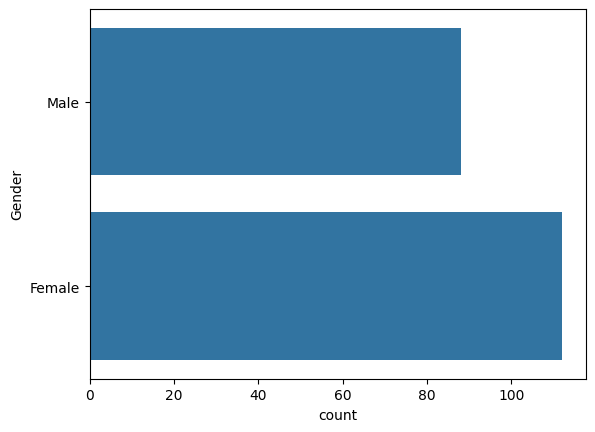

In [5]:
# Looking at disrtibution of categorical variable 'Gender' 
sns.countplot(data1["Gender"])

The data set includes a near 50-50 split between males and females

#### Visualise Data Distributions

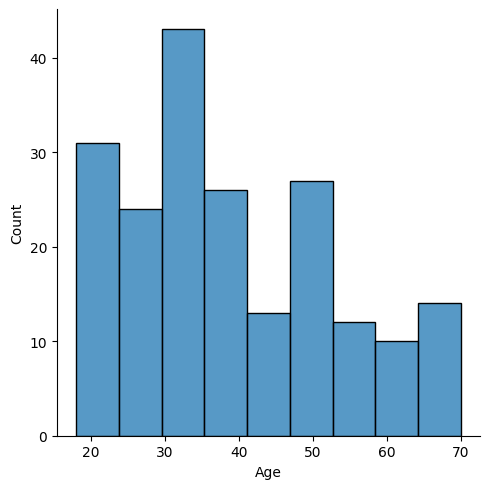

In [6]:
# Remove categorical data column (Gender)
data1.drop(columns="Gender", inplace=True)

# Visualise Age distribution
sns.displot(data1["Age"])

Age data shows a uniform distribution, with a slight skew towards younger customers

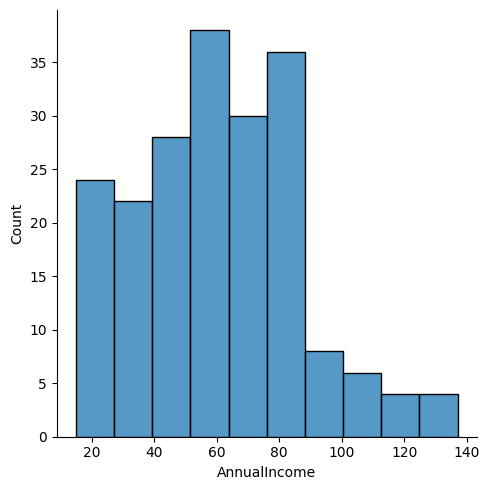

In [7]:
# Visualise Annual Income distribution
sns.displot(data1["AnnualIncome"])

Annual Income also shows a biphasic distribution skewed towards lower earnings, with a full range of between 20k up to 140k USD/year

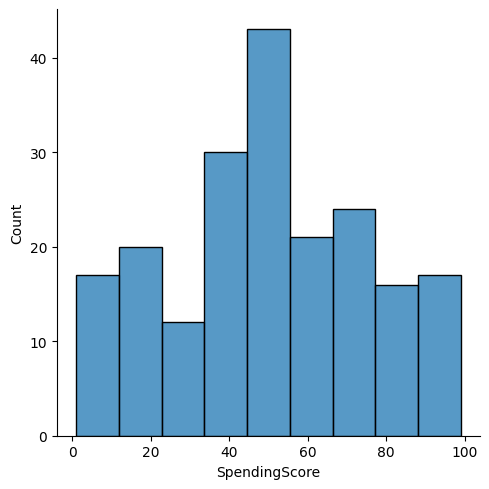

In [8]:
# Visualise Spending Score distribution
sns.displot(data1["SpendingScore"])

Spending score data distribution shows a different profile, with lower amount of customers with lower spending score as well as higher spending scores, while most customers have an average score between 40 and 60.

#### Identify Data Correlations

<Axes: >

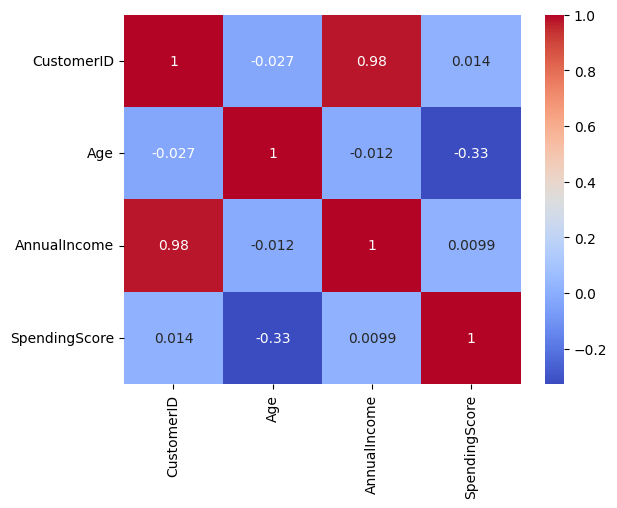

In [9]:
# Visualise all dara correlations as matrix
corr = data1.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")

- High correlation between Annual Income and CustimerID (which is bizarre)
- There is some inverse correlation between Spending Score and Age, which makes sense as younger people spend a lot more in general.

### Data Clustering & Validation

#### Cluster data using only 2 features

In [10]:
# Cluster on 2 features (2 dimensional data)
data2 = data1[["AnnualIncome", "SpendingScore"]]

data2.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

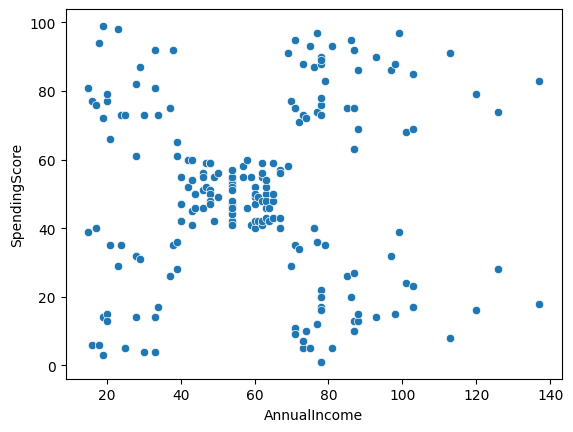

In [11]:
# Visualise data as scatter plot
sns.scatterplot(x=data2["AnnualIncome"], y=data2["SpendingScore"])

It already appears like there are 5 distinct clusters from this scattergraph.

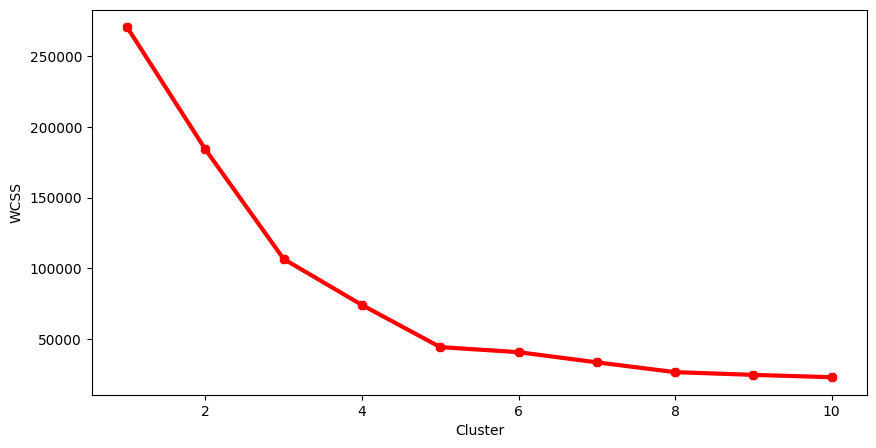

In [77]:
# Import modules
from sklearn.cluster import KMeans

# try a range of cluster numbers with K-means
errors = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data2)
    errors.append(kmeans.inertia_)


    # Visualise results of elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1,11), errors, linewidth=3, color="red", marker="8")
plt.xlabel("Cluster")
plt.ylabel("WCSS")

plt.show()

Point at which WCSS does not decrease significantly after 5 clusters, highlighting this number as the optimal number of clusters, as suggested by the scatter plot above.

In [78]:
# Segment data using K-means method with 5 clusters
optimum_clusters = KMeans(n_clusters=5, init="k-means++", random_state=42)
optimum_clusters.fit(data2)

# Predict 
y = optimum_clusters.predict(data2)

# Add Cluster number to data table
data2["Cluster"] = y

# Inspect data
data2.head()

C:\Users\scott\AppData\Local\Temp\ipykernel_19696\3555842969.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Cluster"] = y


,AnnualIncome,SpendingScore,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

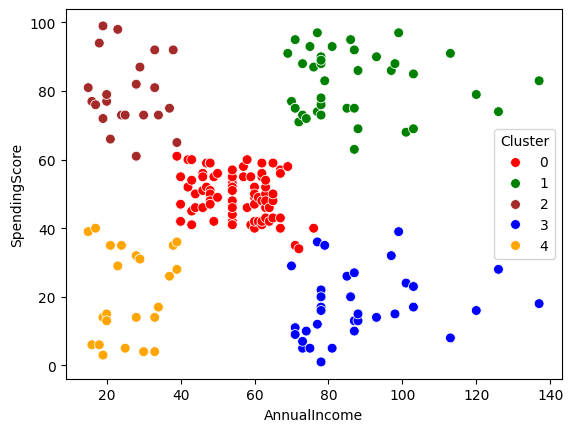

In [79]:
sns.scatterplot(x="AnnualIncome", y="SpendingScore", data=data2, hue="Cluster", s=50, palette= ["red", "green", "brown", "blue", "orange"])

In [80]:
# Validate model using Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(data2,y)
print(score)

0.5553744823146946


#### Clustering data using all 3 numerical features

In [76]:
# Cluster on all numerical features
X = data1.iloc[:, 1:4].values

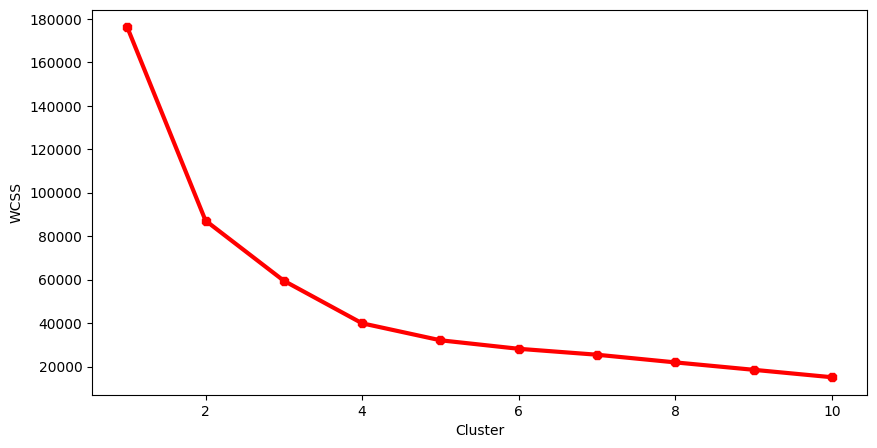

In [72]:
# Try a range of cluster numbers with K-means
errors2 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    errors2.append(kmeans.inertia_)


# Visualise results of elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1,11), errors2, linewidth=3, color="red", marker="8")

plt.xlabel("Cluster")
plt.ylabel("WCSS")

plt.show()

When considering Age in addition to the previous 2 features, the clustering seems to fit better within 4 clusters rather than 5.

In [90]:
# Segment data using K-means method with 4 clusters
optimum_clusters = KMeans(n_clusters=4, init="k-means++", random_state=42)
optimum_clusters.fit(X)

# Predict 
y2 = optimum_clusters.predict(X)

# Add Cluster number to data table
data1["Cluster"] = y2

# Inspect data
data1.head()

,CustomerID,Age,AnnualIncome,SpendingScore,Cluster
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,0
3,4,23,16,77,2
4,5,31,17,40,0


In [93]:
# Separate clusters
cluster0 = data1[data1.Cluster == 0]
cluster1 = data1[data1.Cluster == 1]
cluster2 = data1[data1.Cluster == 2]
cluster3 = data1[data1.Cluster == 3]

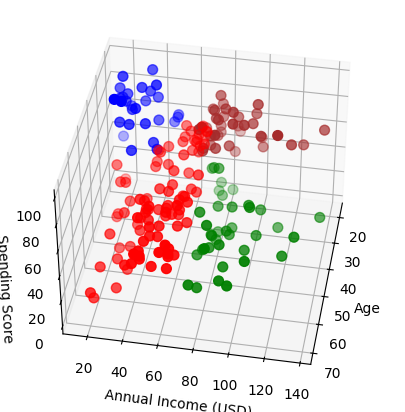

In [121]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cluster0.Age, cluster0.AnnualIncome, cluster0.SpendingScore, c="red", s=50, label="Cluster 0")
ax.scatter(cluster1.Age, cluster1.AnnualIncome, cluster1.SpendingScore, c="brown", s=50, label="Cluster 0")
ax.scatter(cluster2.Age, cluster2.AnnualIncome, cluster2.SpendingScore, c="blue", s=50, label="Cluster 0")
ax.scatter(cluster3.Age, cluster3.AnnualIncome, cluster3.SpendingScore, c="green", s=50, label="Cluster 0")

ax.view_init(40,10)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (USD)")
ax.set_zlabel("Spending Score")

plt.show()

In [122]:
# Validate model using Silhouette Score
score2 = silhouette_score(data1,y2)
print(score2)

0.3483487831390095
